In [1]:
import pandas as pd

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [6]:
transaction_types = {
    "CASH_OUT": {},
    "TRANSFER": {},
}
for transaction_type in transaction_types:
    transaction_types[transaction_type]["train"] = pd.read_csv(f"../datasets/03_features/{transaction_type}_train.csv", index_col=0)
    transaction_types[transaction_type]["val"] = pd.read_csv(f"../datasets/03_features/{transaction_type}_val.csv", index_col=0)
    transaction_types[transaction_type]["test"] = pd.read_csv(f"../datasets/03_features/{transaction_type}_test.csv", index_col=0)

train = transaction_types["TRANSFER"]["train"]
val = transaction_types["TRANSFER"]["val"]
test = transaction_types["TRANSFER"]["test"]

X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_val, y_val = val.iloc[:,:-1], val.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

In [94]:
model = LinearSVC(class_weight={0:1, 1:1})
model.fit(X_train, y_train)

LinearSVC(class_weight={0: 1, 1: 1})

In [26]:
y_pred = model.predict(X_val)

In [27]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [31]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     77517
           1       0.99      0.25      0.40      2420

    accuracy                           0.98     79937
   macro avg       0.99      0.63      0.70     79937
weighted avg       0.98      0.98      0.97     79937



In [40]:
report = pd.DataFrame(classification_report(y_val, y_pred, output_dict=True)).transpose()
report

,precision,recall,f1-score,support
0,0.999948,0.977182,0.988434,79323.000000
1,0.252066,0.993485,0.402109,614.000000
accuracy,0.977307,0.977307,0.977307,0.977307
macro avg,0.626007,0.985334,0.695272,79937.000000
weighted avg,0.994204,0.977307,0.983930,79937.000000


In [46]:
report.loc["1"]

Index(['precision', 'recall', 'f1-score', 'support'], dtype='object')

In [48]:
for k, v in report.loc["1"].items():
    print(k, v)

precision 0.25206611570247933
recall 0.993485342019544
f1-score 0.4021094264996704
support 614.0


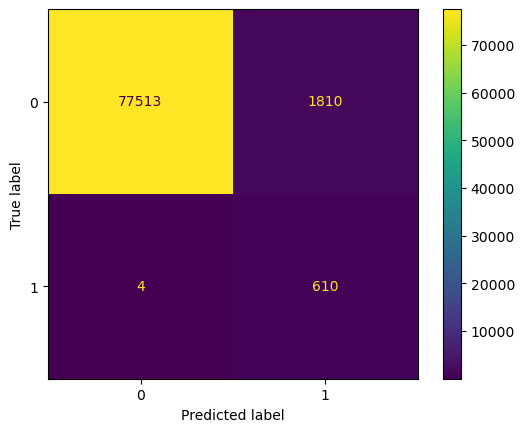

In [29]:
conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)
ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_).plot(values_format=".5g")

In [53]:
from sklearn.metrics import precision_recall_fscore_support

In [62]:
(
    (_, precision),
    (_, recall),
    (_, fscore),
    (_, _),
) = precision_recall_fscore_support(y_true=y_val, y_pred=y_pred, average=None)
print(precision, recall, fscore)

0.25206611570247933 0.993485342019544 0.4021094264996704


In [63]:
from sklearn.metrics import auc, precision_recall_curve

In [96]:
from sklearn.metrics import recall_score

In [97]:
tnr = recall_score(y_val, y_pred, pos_label=0)
fpr = 1 - tnr
fpr

0.022818098155642175

In [66]:
y1, y2 = y_train, model.decision_function(X_train)

In [68]:
pre_lr, rec_lr, thresh_lr = precision_recall_curve(y1, y2, pos_label=1)

In [71]:
area = auc(rec_lr, pre_lr)
area

0.980095867394097

In [76]:
from sklearn.metrics import PrecisionRecallDisplay

In [87]:
import matplotlib.pyplot as plt
plt.style.use("bmh")

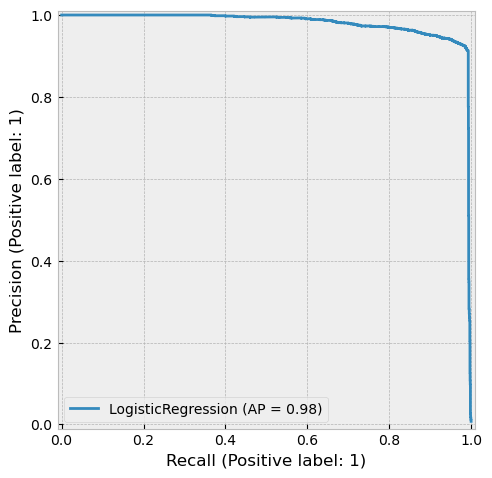

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))

PrecisionRecallDisplay.from_estimator(model, X_train, y_train, pos_label=1, ax=ax)
# PrecisionRecallDisplay.from_estimator(model, X_val, y_val, pos_label=1, ax=ax)

fig.tight_layout()